In [0]:
import torch
import numpy as np
import matplotlib.pyplot as plt

from google.colab import drive
from google.colab import files

import os

In [2]:
drive.mount('/content/drive')
root_path = '/content/drive/My Drive/IFT6135/A2/'

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
def plot_lr_curves(dir_path):
    x = np.load(os.path.join(dir_path, 'learning_curves.npy'))[()]
    
    # Training and validation ppl over epochs and wall clock times
    epochs = range(len(x['times']))
    times = [np.asarray(x['times'])[:i+1].sum() for i in epochs] # Inefficient but oh well
    
    for x_data, name in [(epochs, 'epochs'), (times, 'wall_clock_time')]:
        plt.clf() # Clear the plot to start a new one
        plt.plot(x_data[1:], x['train_ppls'][1:], 'r-', label='Train PPL')
        plt.plot(x_data[1:], x['val_ppls'][1:], 'b-', label='Validation PPL')
        plt.title(f'{os.path.basename(os.path.normpath(dir_path))}: Training and validation PPL over {name}')
        plt.ylabel('Perplexity')
        plt.xlabel(name)
        plt.legend()
        plt.savefig(os.path.join(dir_path, f'lr_curves_{name}.jpg'))

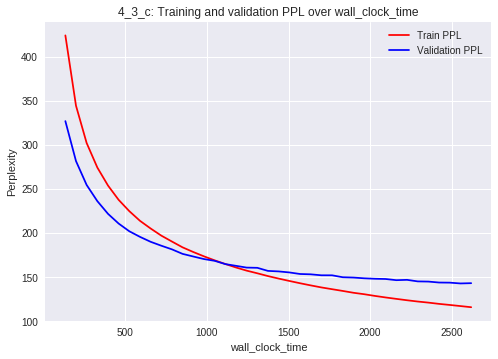

In [4]:
# Generate the learning curves plots for each experiment (first point under the "Figures and Tables" section of the assignment)
results_directories = next(os.walk(root_path))[1]
for result_dir in results_directories:
    plot_lr_curves(os.path.join(root_path, result_dir))

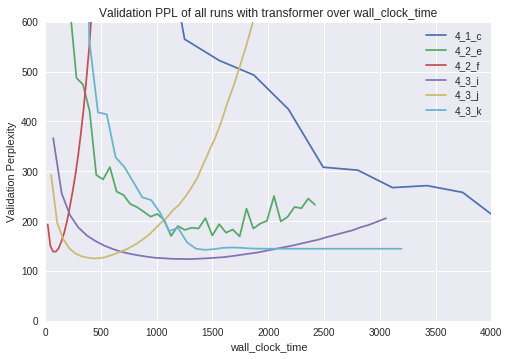

In [7]:
# Generate the plots for each optimizer (point 4 under the "Figures and Tables" section of the assignment)
sgd_paths = ['4_2_a', '4_2_c', '4_2_e']
sgd_lr_schedule_paths = ['4_1_b', '4_1_c', '4_2_b', '4_3_d', '4_3_e', '4_3_f', '4_3_k']
adam_paths = ['4_1_a', '4_2_d', '4_2_f', '4_3_a', '4_3_b', '4_3_c', '4_3_g', '4_3_h', '4_3_i', '4_3_j']

# Generate the plots for each architecture (point 5 under the "Figures and Tables" section of the assignment)
rnn_paths = ['4_1_a', '4_2_a', '4_2_b', '4_3_a', '4_3_b', '4_3_c', '4_3_d']
gru_paths = ['4_1_b', '4_2_c', '4_2_d', '4_3_e', '4_3_f', '4_3_g', '4_3_h']
transformer_paths = ['4_1_c', '4_2_e', '4_2_f', '4_3_i', '4_3_j', '4_3_k']

for plt_type in ['epochs', 'wall_clock_time']:
    for paths, name in [(sgd_paths, 'sgd'), (sgd_lr_schedule_paths, 'sgd_lr_schedule'), (adam_paths, 'adam'), (rnn_paths, 'rnn'), (gru_paths, 'gru'), (transformer_paths, 'transformer')]:
        plt.clf() # Clear the plot
        for path in paths:
            dir_path = os.path.join(os.path.join(root_path, path))
            try: # While we wait for all the results, just ignore missing folders/files
                x = np.load(os.path.join(dir_path, 'learning_curves.npy'))[()]

                epochs = range(len(x['times']))
                x_data = epochs if plt_type == 'epochs' else [np.asarray(x['times'])[:i+1].sum() for i in epochs]
                plt.plot(x_data, x['val_ppls'], label=path)
            except:
                pass
        plt.ylabel('Validation Perplexity')
        plt.ylim(0, 600)
        plt.xlabel(plt_type)
        
        if plt_type == 'wall_clock_time':
            plt.xlim(0, 4000)
        
        plt.title(f"Validation PPL of all runs with {name} over {plt_type}")
        plt.legend()
        plt.savefig(os.path.join(root_path, f"{plt_type}_{name}.jpg"))
